## Analysis of android Accelerometer data in vehicles 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Read only 2000 entries for better visualization

In [3]:
data=pd.read_csv("Accerometer_data.csv",nrows=2000)

Lets look at the data, we have timestamp in first column and accerometer data in the following columns.

In [15]:
data.head(2)

,Time,X,Y,Z
0,1184389.063,1.729,4.425,6.333
1,1184389.082,1.729,4.425,6.333


X,Y,Z represents the accelrometer sensor data of the android phone that was
collected during vehicle routes. 


<p><b>X</b>-> Acceleration in x-direction</p>
<p><b>Y</b>-> Acceleration in y-direction</p>
<p><b>Z</b>-> Acceleration in Z-direction</p>

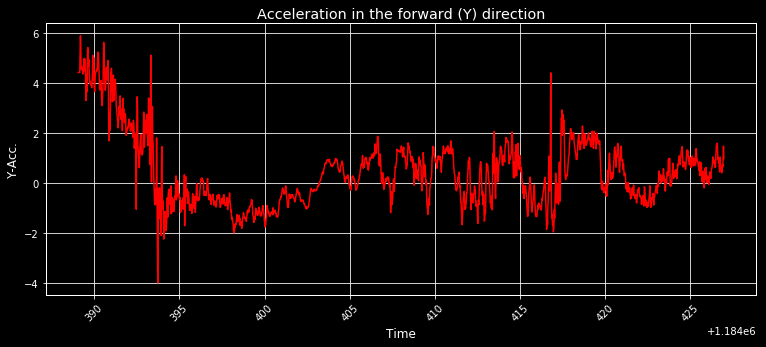

In [8]:
plt.style.use(['dark_background'])
fig =  plt.figure(figsize=(28,5))
ax1 = fig.add_subplot(121)
ax1.plot(data['Time'], data['Y'] ,'r-', label = 'Y Acc.')
ax1.set_title('Acceleration in the forward (Y) direction')
ax1.set_ylabel('Y-Acc.')
ax1.set_xlabel('Time')

plt.xticks(rotation = 45)
plt.style.use('ggplot')
plt.show()

## Lets try to identify Car Jerks and Overspeeding

When the Acceleration forward drops very quickly or is higher then normal

<b>when it changes suddenly</b>

In [64]:
K=list(data['Y'])[1:]
K.append(0.00)
O=[list(data['Y'])[i]-K[i] for i in range(len(K))]
O=pd.Series(O)
high = data['Y'][(abs(O)>3)].index
high = list(high)

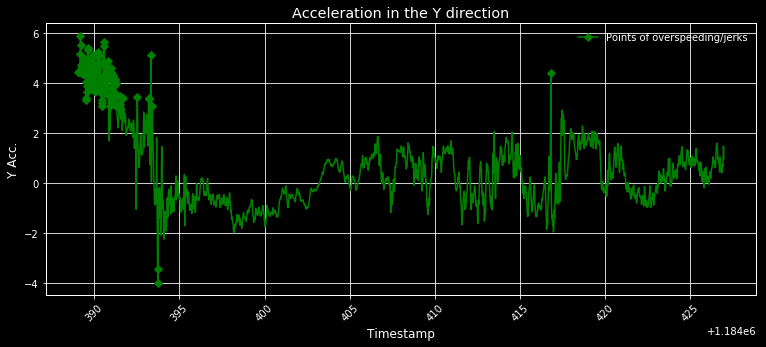

In [72]:
plt.style.use(['dark_background'])
fig =  plt.figure(figsize=(28,5))
ax1 = fig.add_subplot(121)
ax1.plot(data['Time'], data['Y'] ,'-gD', label = 'Points of overspeeding/jerks', markevery= high)
ax1.set_title('Acceleration in the Y direction')
ax1.set_ylabel('Y Acc.')
ax1.set_xlabel('Timestamp')
plt.legend(frameon=False)
plt.xticks(rotation = 45)

plt.show()

<b>When acceleration is High</b>

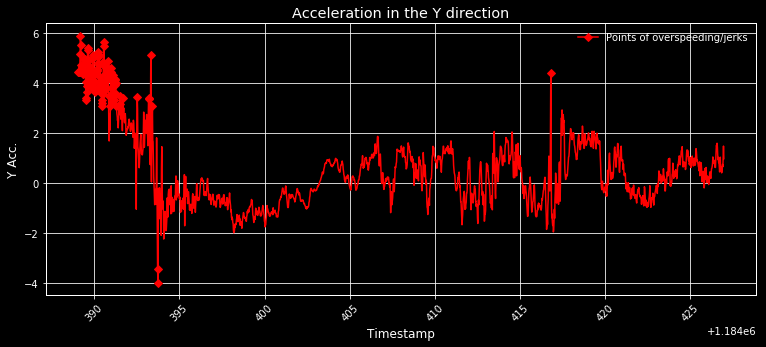

In [69]:
high = data['Y'][(abs(data['Y'])>3)].index
high = list(high)
plt.style.use(['dark_background'])
fig =  plt.figure(figsize=(28,5))
ax1 = fig.add_subplot(121)
ax1.plot(data['Time'], data['Y'] ,'-rD', label = 'Points of overspeeding/jerks', markevery= high)
ax1.set_title('Acceleration in the Y direction')
ax1.set_ylabel('Y Acc.')
ax1.set_xlabel('Timestamp')
plt.legend(frameon=False)
plt.xticks(rotation = 45)

plt.show()


## Bumps/Pothole Detection

In [50]:
#Mean accelration in Z direction
Mean=sum(data['Z'])/len(data['Z'])
Mean

9.706291499999999

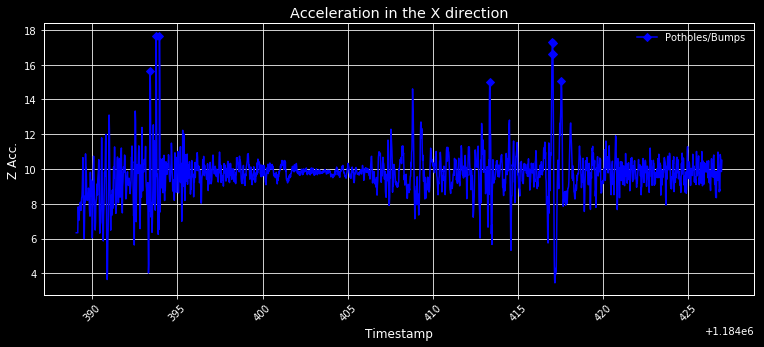

In [51]:
high = data['Z'][(abs(data['Z'])>15)].index # a lot high than normal
high = list(high)
fig =  plt.figure(figsize=(28,5))
ax1 = fig.add_subplot(121)
ax1.plot(data['Time'], data['Z'] ,'-bD', label = 'Potholes/Bumps', markevery= high)
ax1.set_title('Acceleration in the Z direction')
ax1.set_ylabel('Z Acc.')
ax1.set_xlabel('Timestamp')
plt.legend(frameon=False)
plt.xticks(rotation = 45)

plt.show()

## Lets try to identify Rash turns

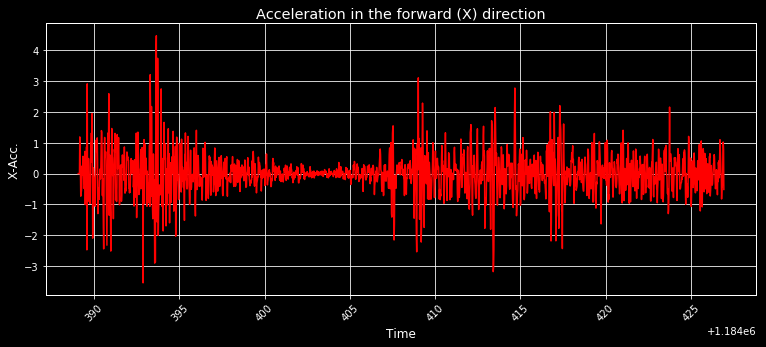

In [81]:
plt.style.use(['dark_background'])
K=pd.Series([data['X'].tolist()[:-1][i]-data['X'].tolist()[1:][i] for i in range(len(data['X'].tolist())-1)])
fig =  plt.figure(figsize=(28,5))
ax1 = fig.add_subplot(121)
ax1.plot(data['Time'][0:-1], K ,'r-', label = 'X Acc.')
ax1.set_title('Acceleration in the forward (X) direction')
ax1.set_ylabel('X-Acc.')
ax1.set_xlabel('Time')

plt.xticks(rotation = 45)
plt.style.use('ggplot')
plt.show()